In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #for Joel's hardness ratio function
from astropy.io import fits
from astropy.table import Table

In [32]:
#Set working directory
os.chdir("/path/to/working/directory")

In [55]:
#Load in lightcurve, background lightcurve, and mkf file
data = fits.open('ni1010100100mpu7_sr1to5.lc',memmap=True)
LC = Table(data[1].data)

data_bkg = fits.open('ni1010100100mpu7_bg1to5.lc',memmap=True)
LC_bkg = Table(data_bkg[1].data)

mkf = fits.open('ni1010100100.mkf')
data = mkf[1].data
data = Table(data)

In [56]:
#Find times when NICER is on target
z_idx = []

for i in np.arange(0,len(data)):
    if (data['ATT_SUBMODE_AZ'][i]==2) and (data['ATT_SUBMODE_EL'][i]==2) and (data['ANG_DIST'][i]<0.004):#  and (data['TIME'][i]<299361111.0 #and (data['SUN_ANGLE'][i]>80): 
        z_idx.append(i)                                                                                     

In [39]:
#Show columns in lightcurve
LC

TIME,RATE,ERROR,FRACEXP,NUM_FPM_SEL,BACKV,BACKE,BACK_COR,BACK_NOISE,BACK_PREL,BACK_SAA,BACK_TREL,BACK_BASELINE
float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
0.0,20.924454,0.4560664,0.33533335,52.0,0.60255086,0.30127543,0.42282784,0.0,0.0,0.0,0.009417737,0.17030531
5400.0,21.289398,0.39051613,0.46533334,52.0,0.5966684,0.2983342,0.3490303,0.0,0.0,6.856613e-07,0.07733214,0.1703053
22200.0,20.72289,0.39502642,0.44266668,52.0,0.3999755,0.19998775,0.16050899,0.0,0.0,0.0,0.06916121,0.1703053
27600.0,21.311312,0.46187273,0.333,52.0,0.42046446,0.21023223,0.16935438,0.0,0.0,0.0,0.08080476,0.17030531
33300.0,20.598705,0.4082355,0.412,52.0,0.5170406,0.2585203,0.2059494,0.0,0.0,0.0,0.1407859,0.1703053
38700.0,20.709759,0.5123291,0.263,52.0,0.6664392,0.3332196,0.29729873,0.0,0.0,0.0,0.1988351,0.17030533
39000.0,22.319475,0.69884986,0.15233333,52.0,0.57958657,0.28979328,0.26004377,0.0,0.0,0.0,0.14923741,0.17030537
44400.0,19.86402,0.39244387,0.432,51.75,0.7437886,0.3718943,0.41126114,0.0,0.0,0.0,0.16222216,0.17030528
49800.0,21.819754,0.6673612,0.193,44.0,0.91633415,0.45816708,0.5745054,0.0,0.0,0.0,0.17152345,0.17030534


In [41]:
#Show columns in background lightcurve
LC_bkg

TIME,BACK_COR,BACK_SAA,BACK_TREL,BACK_PREL,BACK_NOISE,BACK_BASELINE,BACK_TOT,BACK_ERR
float64,float32,float32,float32,float32,float32,float32,float32,float32
0.0,0.42282784,0.0,0.009417737,0.0,0.0,0.17030531,0.60255086,0.30127543
5400.0,0.3490303,6.856613e-07,0.07733214,0.0,0.0,0.1703053,0.5966684,0.2983342
22200.0,0.16050899,0.0,0.06916121,0.0,0.0,0.1703053,0.3999755,0.19998775
27600.0,0.16935438,0.0,0.08080476,0.0,0.0,0.17030531,0.42046446,0.21023223
33300.0,0.2059494,0.0,0.1407859,0.0,0.0,0.1703053,0.5170406,0.2585203
38700.0,0.29729873,0.0,0.1988351,0.0,0.0,0.17030533,0.6664392,0.3332196
39000.0,0.26004377,0.0,0.14923741,0.0,0.0,0.17030537,0.57958657,0.28979328
44400.0,0.40928394,0.0,0.16144225,0.0,0.0,0.16948651,0.7402127,0.37010634
49800.0,0.48611993,0.0,0.14513522,0.0,0.0,0.14410453,0.7753597,0.38767985


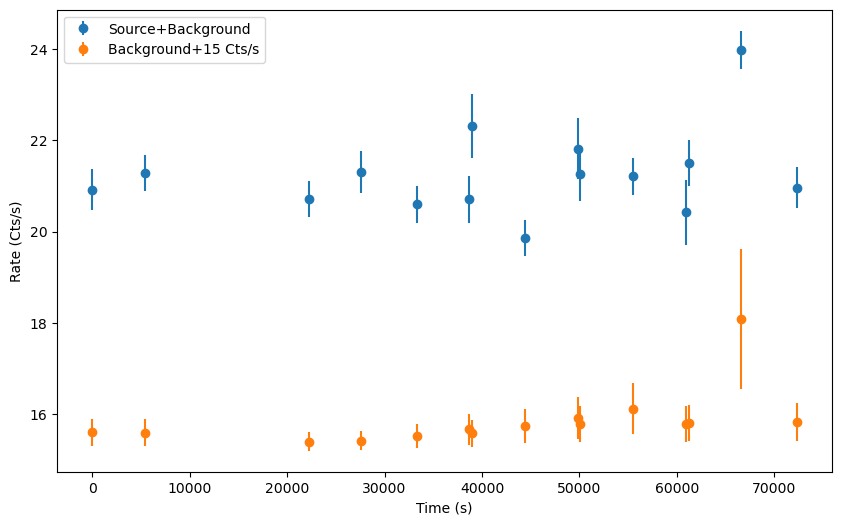

In [59]:
#Plot Source+Background and Background light curve
plt.figure(figsize=(10,6))
plt.errorbar(LC['TIME'],LC['RATE'],yerr=LC['ERROR'],ls='None',marker='o',label="Source+Background")
#NOTE WE ADDED 15 TO THE BACKGROUND COUNT RATE FOR EASIER COMPARISON BY EYE
plt.errorbar(LC['TIME'],LC['BACKV']+15,yerr=LC['BACKE'],ls='None',marker='o', label='Background+15 Cts/s')
plt.xlabel('Time (s)')
plt.ylabel('Rate (Cts/s)')
plt.legend()

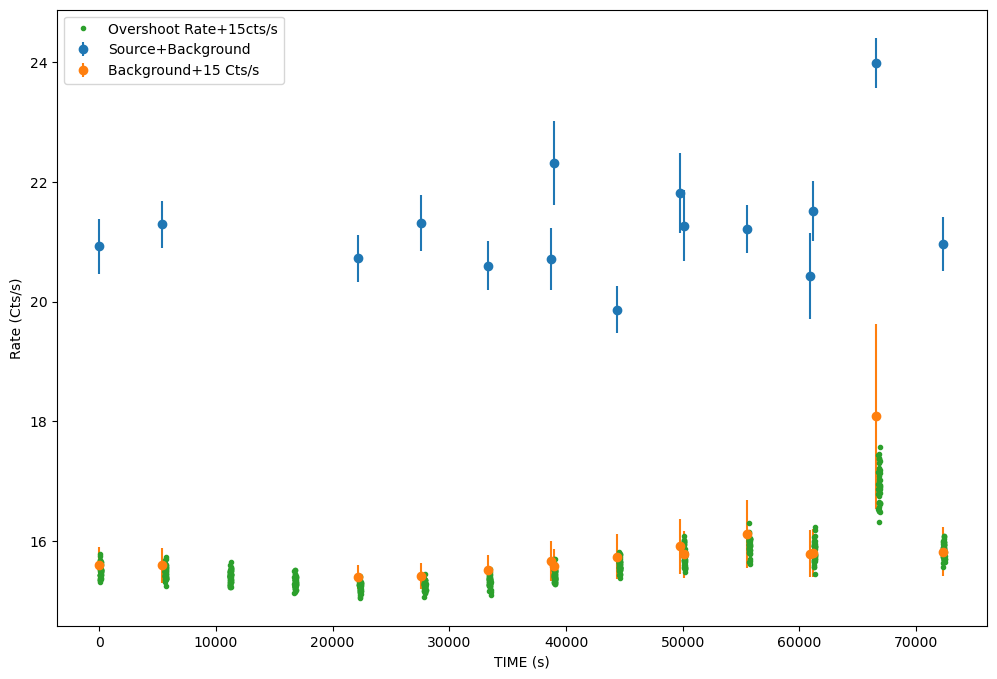

In [64]:
#Plot Source+Background and Background light curve and overshoot rate, which is the likely cause for the "flare" 
#seen in the data
plt.figure(figsize=(12,8))
plt.errorbar(LC['TIME'],LC['RATE'],yerr=LC['ERROR'],ls='None',marker='o',label="Source+Background")
#NOTE WE ADDED 15 TO THE BACKGROUND COUNT RATE FOR EASIER COMPARISON BY EYE
plt.errorbar(LC['TIME'],LC['BACKV']+15,yerr=LC['BACKE'],ls='None',marker='o', label='Background+15 Cts/s')
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['FPM_OVERONLY_COUNT'][z_idx]+15,linestyle='None',marker='.',label='Overshoot Rate+15cts/s')
plt.xlabel('TIME (s)')
plt.ylabel('Rate (Cts/s)')
plt.legend()